In [2]:
from IPython.display import IFrame
IFrame("./TPL6_SussiniFacundo.pdf", width=1000, height=1000)

#### Función de Transferencia Original

<IPython.core.display.Math object>

#### Función Factorizada

<IPython.core.display.Math object>

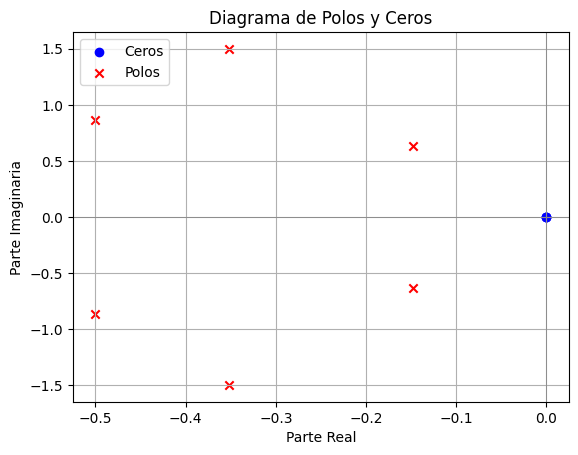

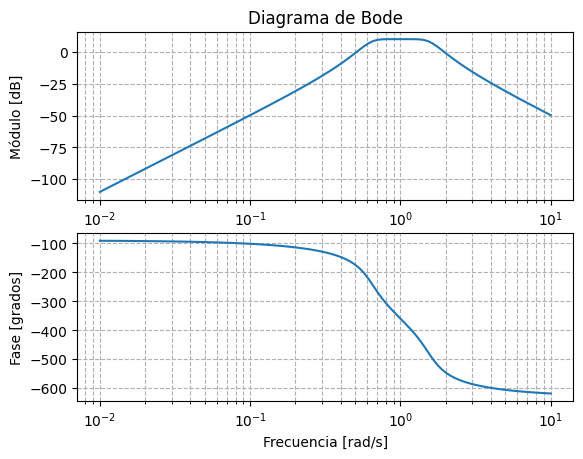

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pytc2.general import print_subtitle, print_latex

# ----- COEFICIENTES -----
k = 3.16
num = [k, 0, 0, 0]
den = [1, 2, 5, 5, 5, 2, 1]

# ----- MOSTRAR FUNCIÓN ORIGINAL -----
print_subtitle("Función de Transferencia Original")

def poly_to_str(coefs):
    terms = []
    n = len(coefs)
    for i, coef in enumerate(coefs):
        exp = n - i - 1
        if abs(coef) < 1e-12:
            continue
        if exp > 1:
            terms.append(f"{coef:.4g} s^{exp}")
        elif exp == 1:
            terms.append(f"{coef:.4g} s")
        else:
            terms.append(f"{coef:.4g}")
    return " + ".join(terms)

num_str = poly_to_str(num)
den_str = poly_to_str(den)
print_latex(r"H(s) = \frac{" + num_str + "}{" + den_str + "}")

# ----- CALCULAR CEROS Y POLOS -----
zeros = np.roots(num)
poles = np.roots(den)

zeros = sorted(zeros, key=lambda z: (np.real(z), np.imag(z)))
poles = sorted(poles, key=lambda p: (np.real(p), np.imag(p)))

# ----- MOSTRAR FACTORIZADA -----
def obtener_factores_sos(raices):
    factores = []
    i = 0
    while i < len(raices):
        if i+1 < len(raices):
            r1, r2 = raices[i], raices[i+1]
            poly = np.poly([r1, r2])
            factores.append(poly)
            i += 2
        else:
            r1 = raices[i]
            poly = np.poly([r1])
            factores.append(poly)
            i += 1
    return factores

num_factores = obtener_factores_sos(zeros)
den_factores = obtener_factores_sos(poles)

print_subtitle("Función Factorizada")

num_fact_str = []
for f in num_factores:
    f_str = poly_to_str(f)
    num_fact_str.append(f"({f_str})")

den_fact_str = []
for f in den_factores:
    f_str = poly_to_str(f)
    den_fact_str.append(f"({f_str})")

print_latex(r"H(s) = \frac{" + " ".join(num_fact_str) + "}{" + " ".join(den_fact_str) + "}")

# ----- DIAGRAMA DE POLOS Y CEROS -----
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Diagrama de Polos y Ceros')
plt.legend()
plt.grid(True)
plt.show()

# ----- DIAGRAMA DE BODE -----
system = signal.TransferFunction(num, den)
w, mag, phase = signal.bode(system)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.ylabel('Módulo [dB]')
plt.title('Diagrama de Bode')
plt.grid(True, which='both', linestyle='--')

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.ylabel('Fase [grados]')
plt.xlabel('Frecuencia [rad/s]')
plt.grid(True, which='both', linestyle='--')

plt.show()
